In [3]:
import pandas as pd

# Load dataset
file_path = "C:\\Users\\Max\\Downloads\\bank-data\\bank-full.csv"
data = pd.read_csv(file_path, sep=";") 

# Inspect the data
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [6]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
label_encoders = {}

# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode the target column 'y' (yes -> 1, no -> 0)
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [9]:
#Split Features and Target
X = data.drop(columns=['y'])
y = data['y']

#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
#Build and Train the SVM Model
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


In [11]:
#Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[11736   230]
 [ 1168   430]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.65      0.27      0.38      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564



In [12]:
#Hyperparameter Tuning 
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}


In [13]:
# Perform grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.0min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.0min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.0min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.1min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  13.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  12.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  13.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  12.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  13.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  11.1s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [31]:
# Predict for all customers
predictions = loaded_model.predict(X_scaled)

# Map predictions to "yes" or "no"
results = ["yes" if pred == 1 else "no" for pred in predictions]

# Combine with original data
data['Prediction'] = results

# Display the predictions
print(data[['Prediction']])  # Show the predictions for each customer

# Save the predictions to a CSV file
data[['Prediction']].to_csv("customer_predictions.csv", index=False)
print("Predictions saved to 'customer_predictions.csv'.")

      Prediction
0             no
1             no
2             no
3             no
4             no
...          ...
45206         no
45207         no
45208        yes
45209         no
45210         no

[45211 rows x 1 columns]
Predictions saved to 'customer_predictions.csv'.


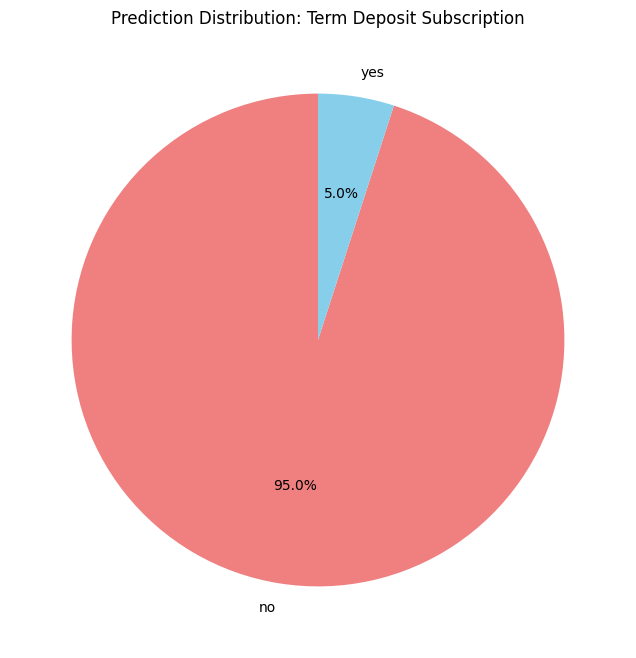

In [43]:
import matplotlib.pyplot as plt

# Count the number of "yes" and "no" predictions
prediction_counts = data['Prediction'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(prediction_counts.values, labels=prediction_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Prediction Distribution: Term Deposit Subscription')
plt.show()
